## Evaluation Exercises

<h3>Scenario</h3>

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

- Load the tips dataset from either pydataset or seaborn. <b>complete</b>

- Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. <b>complete</b>

    - Here is some sample code to get you started:

``` 
from statsmodels.formula.api import ols

 model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x) 

```

- The code above fits a linear regression model on the df dataset, using column y as the target and column x as the predictor. Modify the code as necessary to work with the tips dataset. <b>complete</b>

- Plot the residuals for the linear regression model that you made. <b>complete</b>

- Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model. <b>complete</b>

- Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount). <b>complete</b>

- Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model. <b>complete</b>

- What is the amount of variance explained in your model? <b>complete</b>

- Is your model significantly better than the baseline model? <b>complete</b>

- Create a file named evaluate.py that contains the following functions. <b>complete</b>

    - plot_residuals(y, yhat): creates a residual plot
    - regression_errors(y, yhat): returns the following values:
        - sum of squared errors (SSE)
        - explained sum of squares (ESS)
        - total sum of squares (TSS)
        - mean squared error (MSE)
        - root mean squared error (RMSE)
    - baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
    - better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
    - model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)
- Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
import evaluate

from pydataset import data
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [4]:
x = df['total_bill']
y = df['tip']

-----

<h5>Create a baseline</h5>

----

In [5]:
df['baseline'] = y.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


----

<h5>Fit a linear regression model</h5>

----

In [6]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('tip ~ total_bill', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)

df

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,2.998279,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.998279,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2.998279,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.998279,2.791807


-----

<h5>Plot the residuals for the linear regression model that you made</h5>

-----

In [7]:
df['residual'] = y - df.yhat
df['baseline_residual'] = y - df.baseline

In [8]:
#Let's check the sums

print(df.residual.sum())
print(df.baseline_residual.sum())

2.113864638886298e-13
-2.4868995751603507e-14


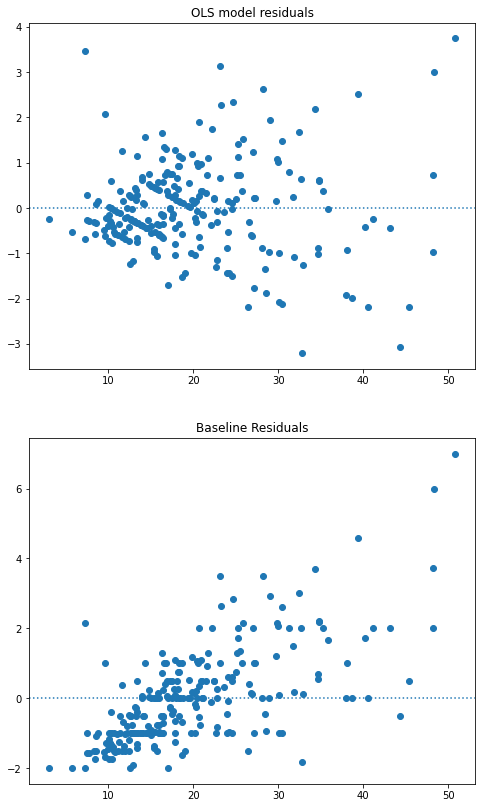

In [9]:
fig, ax = plt.subplots(2, figsize=(8, 14))

ax[0].scatter(x, df.residual)
ax[0].axhline(y = 0, ls = ':')
ax[0].set_title('OLS model residuals');


ax[1].scatter(x, df.baseline_residual)
ax[1].axhline(y = 0, ls = ':')
ax[1].set_title('Baseline Residuals');

----
<h5>Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.</h5>

----

In [10]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head(1)



,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
0,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252


----

<h5>Sum of Squared Errors</h5>

-----

In [11]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print("SSE = ", SSE)
print("SSE Baseline = ", SSE_baseline)

SSE =  252.788743850776
SSE Baseline =  465.2124770491804


----

<h5>Total Sum of Squares</h5>

-----

In [12]:
TSS = SSE_baseline
TSS

465.2124770491804

----

<h5>Explained Sum of Squares</h5>

-----

In [13]:
ESS = TSS - SSE
ESS

212.4237331984044

----

<h5>Mean Squared Error</h5>

-----

In [14]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.036019442011377
MSE baseline =  1.906608512496641


----

<h5> Root Mean Squared Error</h5>

-----

In [15]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298954


-----

<h5>Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.</h5>

---

In [16]:
if SSE < SSE_baseline:
    print(f'The sum of squared errors model of {SSE} performs better than the residual result of {SSE_baseline}')
else:
    print(f'The sum of squared errors residual {SSE_baseline} performs better than the SSE model of {SSE}')

The sum of squared errors model of 252.788743850776 performs better than the residual result of 465.2124770491804


----

<h5>What is the amount of variance explained in your model?</h5>

----

In [17]:
# Calculate R2
R2 = ESS/TSS
R2

0.45661658635167646

----

<h5>Is your model significantly better than the baseline model?</h5>

---

<font color = 'blue'><i>The model performs better than the baseline but the R^2 is under 50%</i></font>

In [18]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           6.69e-34
Time:                        09:06:29   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h5>Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.</h5>

In [19]:
df = data('mpg')

In [20]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [21]:
x = df['displ']
y = df['hwy']

In [22]:
df['baseline'] = y.mean()
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171


In [23]:

# generate parameters, i.e. create model
ols_model = ols('hwy ~ displ', data=df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(x)


In [24]:
df['residual'] = y - df.yhat
df['baseline_residual'] = y - df.baseline

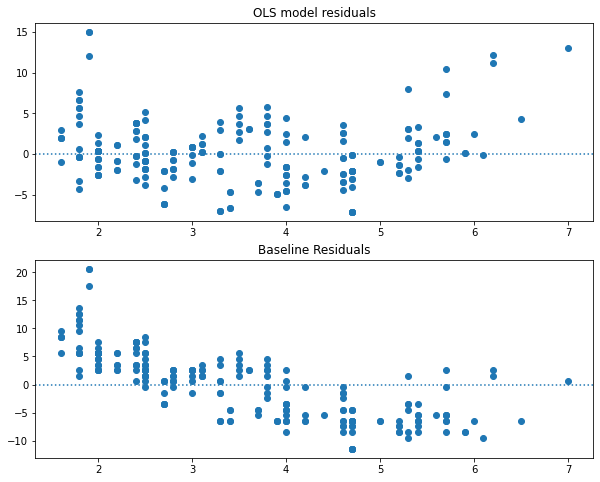

In [25]:
evaluate.plot_residuals(x, y, df)

In [26]:
evaluate.regression_errors(x, y, df)

The SSE Baseline 8261.66 & and SSE is 3413.83


The total sum of squares is 8261.66


The explained sum of squares is 4847.83


The mean squared error is 14.59 & the MSE baseline is 35.31


The root mean squared error is 3.82 & the RMSE baseline is 5.94


  metric  model_error
0    SSE  3413.829009
1    MSE    14.589013
2   RMSE     3.819557
          metric  model_error
0   SSE_baseline  8261.662393
1   MSE_baseline    35.306250
2  RMSE_baseline     5.941906


In [27]:
evaluate.baseline_mean_errors(x, y, df)

the SSE2 is 3413.83 & the baseline is 8261.66 .


the MSE2 is 14.59 & the baseline is 35.31 .


the RMSE2 is 3.82 & the baseline is 5.94  .


  metric  model_error
0   SSE2  3413.829009
1   MSE2    14.589013
2  RMSE2     3.819557
           metric  model_error
0   SSE2_baseline  8261.662393
1   MSE2_baseline    35.306250
2  RMSE2_baseline     5.941906


In [28]:
evaluate.better_than_baseline(x, y, df)

'The sum of squared errors model of 3413.83 performs better than the residual result of 8261.66'

In [29]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    hwy   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     329.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           2.04e-46
Time:                        09:07:53   Log-Likelihood:                -645.62
No. Observations:                 234   AIC:                             1295.
Df Residuals:                     232   BIC:                             1302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6977      0.720     49.555      0.000      34.278      37.117
displ         -3.5306      0.195    -18.151      0.000      -3.914      -3.147
==============================================================================
Omnibus:                       45.280   Durbin-Watson:                   0.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.192
Skew:                           0.961   Prob(JB):                     2.60e-20
Kurtosis:                       5.357   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""